In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import expit, logit, comb
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import os

In [2]:
data_dir = '/mnt/lareaulab/cfbuenabadn/data_sc_regulation/data_autocorrelation/'
tiklova_mrna_event = pd.read_csv(data_dir + 'tiklova_neurogenesis/mrna_per_event.tab', sep='\t', index_col=0)
tiklova_rd = pd.read_csv(data_dir + 'tiklova_neurogenesis/rd_pc2.tab', sep='\t', index_col=0)
tiklova_PSI = pd.read_csv(data_dir + 'tiklova_neurogenesis/skipped_exons_psi.tab', sep='\t', index_col=0)
tiklova_psix = pd.read_csv('tiklova_neurogenesis.scores.txt', sep='\t', index_col=0)
tiklova_pseudotime = pd.read_csv('~/data_sc_regulation/data_autocorrelation/tiklova_neurogenesis/pseudotime.tab', 
                                 sep='\t', index_col=0)

sig_exons = tiklova_psix.loc[(tiklova_psix.qvals <= 0.05) & (tiklova_psix.L_score > 0)].index

100%|██████████| 1988/1988 [00:10<00:00, 183.19it/s]


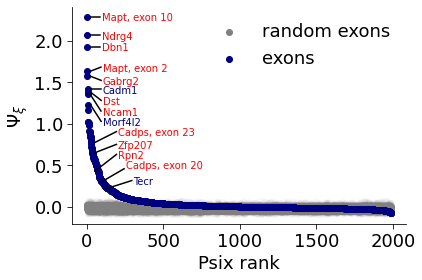

In [3]:
random_df = pd.DataFrame()
for mean_var in os.listdir('tiklova_neurogenesis_pvals'):
    with open('tiklova_neurogenesis_pvals/' + mean_var) as fh:
        random_scores = [np.float(x.rstrip()) for x in fh.readlines()]
    mean_var = mean_var.split('.')[0]
    random_df[mean_var] = random_scores
    
fig = plt.figure()
ax  = plt.subplot(1,1,1)
i = 1

ax.scatter([100], [-0.05], c='gray', label='random exons')

for mean_var in tqdm(tiklova_psix.sort_values('L_score')[::-1].bin):
    subset = np.random.choice(random_df[mean_var], 50, replace=False)
    ax.scatter([i]*50, subset, c='gray', alpha=0.02)
    i += 1


plt.text(100, tiklova_psix.loc['Mapt_1'].L_score-0.05, 'Mapt, exon 10', c='red')   
plt.plot([20, 90], [tiklova_psix.loc['Mapt_1'].L_score, tiklova_psix.loc['Mapt_1'].L_score],c='black')

plt.text(100, tiklova_psix.loc['Ndrg4_1'].L_score-0.05, 'Ndrg4', c='red')   
plt.plot([20, 90], [tiklova_psix.loc['Ndrg4_1'].L_score, tiklova_psix.loc['Ndrg4_1'].L_score],c='black')

plt.text(100, tiklova_psix.loc['Dbn1_1'].L_score-0.05, 'Dbn1', c='red')   
plt.plot([20, 90], [tiklova_psix.loc['Dbn1_1'].L_score, tiklova_psix.loc['Dbn1_1'].L_score],c='black')

plt.text(104, tiklova_psix.loc['Mapt_3'].L_score, 'Mapt, exon 2', c='red')    
plt.plot([24, 94], [tiklova_psix.loc['Mapt_3'].L_score, tiklova_psix.loc['Mapt_3'].L_score+0.05],c='black')
plt.text(105, tiklova_psix.loc['Gabrg2_1'].L_score-0.1, 'Gabrg2', c='red')   
plt.plot([25, 95], [tiklova_psix.loc['Gabrg2_1'].L_score, tiklova_psix.loc['Gabrg2_1'].L_score-0.05],c='black')



plt.text(104, tiklova_psix.loc['Cadm1_10'].L_score-0.05, 'Cadm1', c='navy')    
plt.plot([24, 94], [tiklova_psix.loc['Cadm1_10'].L_score, tiklova_psix.loc['Cadm1_10'].L_score],c='black')
plt.text(105, tiklova_psix.loc['Dst_5'].L_score-0.15, 'Dst', c='red')   
plt.plot([25, 95], [tiklova_psix.loc['Dst_5'].L_score, tiklova_psix.loc['Dst_5'].L_score-0.1],c='black')


plt.text(104, tiklova_psix.loc['Ncam1_6'].L_score-0.25, 'Ncam1', c='red')    
plt.plot([24, 94], [tiklova_psix.loc['Ncam1_6'].L_score, tiklova_psix.loc['Ncam1_6'].L_score-0.2],c='black')
plt.text(105, tiklova_psix.loc['Morf4l2_7'].L_score-0.25, 'Morf4l2', c='navy')   
plt.plot([25, 95], [tiklova_psix.loc['Morf4l2_7'].L_score, tiklova_psix.loc['Morf4l2_7'].L_score-0.2],c='black')

plt.text(305, tiklova_psix.loc['Tecr_6'].L_score+0.05, 'Tecr', c='navy')   
plt.plot([125, 295], [tiklova_psix.loc['Tecr_6'].L_score, tiklova_psix.loc['Tecr_6'].L_score+0.1],c='black')

plt.text(205, tiklova_psix.loc['Rpn2_3'].L_score+0.15, 'Rpn2', c='red')   
plt.plot([55, 195], [tiklova_psix.loc['Rpn2_3'].L_score, tiklova_psix.loc['Rpn2_3'].L_score+0.2],c='black')


plt.text(255, tiklova_psix.loc['Cadps_2'].L_score+0.15, 'Cadps, exon 20', c='red')   
plt.plot([105, 245], [tiklova_psix.loc['Cadps_2'].L_score, tiklova_psix.loc['Cadps_2'].L_score+0.15],c='black')

plt.text(205, tiklova_psix.loc['Cadps_7'].L_score+0.08, 'Cadps, exon 23', c='red')   
plt.plot([55, 195], [tiklova_psix.loc['Cadps_7'].L_score, tiklova_psix.loc['Cadps_7'].L_score+0.13],c='black')

plt.text(205, tiklova_psix.loc['Zfp207_1'].L_score+0.05, 'Zfp207', c='red')   
plt.plot([55, 195], [tiklova_psix.loc['Zfp207_1'].L_score, tiklova_psix.loc['Zfp207_1'].L_score+0.1],c='black')




ax.scatter(np.arange(1, len(tiklova_psix.index)+1), tiklova_psix.sort_values('L_score')[::-1].L_score, c = 'navy',
          label='exons')
    
plt.xlabel('Psix rank', fontsize=18)
plt.ylabel(r'$\Psi_{\xi}$', fontsize=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(labelsize=18, length=5)
# plt.title('Neurogenesis exons', fontsize=18)
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
plt.legend(frameon=False, fontsize=18)

In [4]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix/utils')
import psix_functions as pr

from scipy.special import logit, expit
import hotspot
W = pr.get_distance_matrix(tiklova_rd, k=100)

def get_background(psi_table, W, exon_list):
    
    psi_output = pd.DataFrame()
    
    for exon in tqdm(exon_list):

        exon_psi = [0.99 if x >= 0.99 else x for x in psi_table.loc[exon]]
        exon_psi = [0.01 if x <= 0.01 else x for x in exon_psi]
        
        blanco = np.array([0 if np.isnan(x) else 1 for x in np.array(exon_psi)])
        
        background_psi = np.array((W*exon_psi).sum(axis=1))/np.array(W*blanco).sum(axis=1)
        
        psi_output[exon] = background_psi
    
    psi_output.index = psi_table.columns
    return psi_output.T

exon_list = tiklova_psix.loc[(tiklova_psix.L_score > 0) & (tiklova_psix.qvals <= 0.05)].index
# background_psi = get_background(tiklova_PSI, W, exon_list)

background_psi = pd.read_csv('background_psi.tab', sep='\t', index_col=0)

  0%|          | 5/1197 [00:00<00:28, 41.58it/s]

Changed cross function


100%|██████████| 1197/1197 [00:24<00:00, 49.33it/s]


In [5]:
from scipy.stats import zmap
from scipy.stats import zscore
from scipy.stats import median_absolute_deviation as mad

def mad_score(array):
    array_median = array.median()
    array_mad = array.mad()
#     print(array_mad)
    return (array-array_median)/array_mad


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import leaves_list


def local_correlation_plot(
            local_correlation_z, modules, linkage,
            mod_cmap='tab10', vmin=-8, vmax=8,
            z_cmap='RdBu_r', yticklabels=False
):

    row_colors = None
    colors = list(plt.get_cmap(mod_cmap).colors)
    module_colors = {i: colors[(i-1) % len(colors)] for i in modules.unique()}
    module_colors[-1] = '#ffffff'

    row_colors1 = pd.Series(
        [module_colors[i] for i in modules],
        index=local_correlation_z.index,
    )

    row_colors = pd.DataFrame({
        "Modules": row_colors1,
    })

    cm = sns.clustermap(
        local_correlation_z,
        row_linkage=linkage,
        col_linkage=linkage,
        vmin=vmin,
        vmax=vmax,
        cmap=z_cmap,
        xticklabels=False,
        yticklabels=yticklabels,
        row_colors=row_colors,
        rasterized=True,
    )

    fig = plt.gcf()
    plt.sca(cm.ax_heatmap)
    plt.ylabel("")
    plt.xlabel("")

    cm.ax_row_dendrogram.remove()

    # Add 'module X' annotations
    ii = leaves_list(linkage)

    mod_reordered = modules.iloc[ii]

    mod_map = {}
    y = np.arange(modules.size)

    for x in mod_reordered.unique():
        if x == -1:
            continue

        mod_map[x] = y[mod_reordered == x].mean()

    plt.sca(cm.ax_row_colors)
    for mod, mod_y in mod_map.items():
        plt.text(-.5, y=mod_y, s="Module {}".format(mod),
                 horizontalalignment='right',
                 verticalalignment='center')
    plt.xticks([])

    # Find the colorbar 'child' and modify
    min_delta = 1e99
    min_aa = None
    for aa in fig.get_children():
        try:
            bbox = aa.get_position()
            delta = (0-bbox.xmin)**2 + (1-bbox.ymax)**2
            if delta < min_delta:
                delta = min_delta
                min_aa = aa
        except AttributeError:
            pass

    min_aa.set_ylabel('Pearson r')
    min_aa.yaxis.set_label_position("left")
    
  
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
# from .utils import neighbor_smoothing_row
# from .local_stats_pairs import create_centered_counts_row
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
from scipy.stats import norm
from statsmodels.stats.multitest import multipletests


# def compute_scores(
#         counts_sub, model, num_umi, neighbors, weights):
#     """
#     counts_sub: row-subset of counts matrix with genes in the module
#     """

#     cc_smooth = np.zeros_like(counts_sub, dtype=np.float64)

#     for i in range(counts_sub.shape[0]):

#         counts_row = counts_sub[i, :]
#         centered_row = create_centered_counts_row(counts_row, model, num_umi)
#         smooth_row = neighbor_smoothing_row(
#             centered_row, neighbors, weights, _lambda=.9)

#         cc_smooth[i] = smooth_row

#     pca_data = cc_smooth

#     model = PCA(n_components=1)
#     scores = model.fit_transform(pca_data.T)

#     sign = model.components_.mean()  # may need to flip
#     if sign < 0:
#         scores = scores * -1

#     scores = scores[:, 0]

#     return scores


def sort_linkage(Z, node_index, node_values):
    """
    Sorts linkage by 'node_values' in place
    """

    N = Z.shape[0] + 1  # number of leaves

    if node_index < 0:
        return

    left_child = int(Z[node_index, 0] - N)
    right_child = int(Z[node_index, 1] - N)

    swap = False

    if left_child < 0 and right_child < 0:
        swap = False
    elif left_child < 0 and right_child >= 0:
        swap = True
    elif left_child >= 0 and right_child < 0:
        swap = False
    else:
        if node_values[left_child] > node_values[right_child]:
            swap = True
        else:
            swap = False

    if swap:
        Z[node_index, 0] = right_child + N
        Z[node_index, 1] = left_child + N

    sort_linkage(Z, left_child, node_values)
    sort_linkage(Z, right_child, node_values)


def calc_mean_dists(Z, node_index, out_mean_dists):
    """
    Calculates the mean density of joins
    for sub-trees underneath each node
    """

    N = Z.shape[0] + 1  # number of leaves

    left_child = int(Z[node_index, 0] - N)
    right_child = int(Z[node_index, 1] - N)

    if left_child < 0:
        left_average = 0
        left_merges = 0
    else:
        left_average, left_merges = calc_mean_dists(
            Z, left_child, out_mean_dists
        )

    if right_child < 0:
        right_average = 0
        right_merges = 0
    else:
        right_average, right_merges = calc_mean_dists(
            Z, right_child, out_mean_dists
        )

    this_height = Z[node_index, 2]
    this_merges = left_merges + right_merges + 1
    this_average = (
        left_average * left_merges + right_average * right_merges + this_height
    ) / this_merges

    out_mean_dists[node_index] = this_average

    return this_average, this_merges


def prop_label(Z, node_index, label, labels, out_clusters):
    """
    Propagates node labels downward if they are not -1
    Used to find the correct cluster label at the leaves
    """

    N = Z.shape[0] + 1  # number of leaves

    if label == -1:
        label = labels[node_index]

    left_child = int(Z[node_index, 0] - N)
    right_child = int(Z[node_index, 1] - N)

    if left_child < 0:
        out_clusters[left_child + N] = label
    else:
        prop_label(Z, left_child, label, labels, out_clusters)

    if right_child < 0:
        out_clusters[right_child + N] = label
    else:
        prop_label(Z, right_child, label, labels, out_clusters)


def prop_label2(Z, node_index, label, labels, out_clusters):
    """
    Propagates node labels downward
    Helper method used in assign_modules
    """

    N = Z.shape[0] + 1  # number of leaves

    parent_label = label
    this_label = labels[node_index]

    if this_label == -1:
        new_label = parent_label
    else:
        new_label = this_label

    left_child = int(Z[node_index, 0] - N)
    right_child = int(Z[node_index, 1] - N)

    if left_child < 0:
        out_clusters[left_child + N] = new_label
    else:
        prop_label2(Z, left_child, new_label, labels, out_clusters)

    if right_child < 0:
        out_clusters[right_child + N] = new_label
    else:
        prop_label2(Z, right_child, new_label, labels, out_clusters)


def assign_modules(Z, leaf_labels, offset, MIN_THRESHOLD=10, Z_THRESHOLD=3):
    clust_i = 0

    labels = np.ones(Z.shape[0])*-1
    N = Z.shape[0]+1

    mean_dists = np.zeros(Z.shape[0])
    calc_mean_dists(Z, Z.shape[0]-1, mean_dists)

    for i in range(Z.shape[0]):

        ca = int(Z[i, 0])
        cb = int(Z[i, 1])

        if ca - N < 0:  # leaf node
            n_members_a = 1
            clust_a = -1
        else:
            n_members_a = Z[ca-N, 3]
            clust_a = labels[ca-N]

        if cb - N < 0:  # leaf node
            n_members_b = 1
            clust_b = -1
        else:
            n_members_b = Z[cb-N, 3]
            clust_b = labels[cb-N]

        if Z[i, 2] > offset - Z_THRESHOLD:
            new_clust_assign = -1
        elif (n_members_a >= MIN_THRESHOLD and n_members_b >= MIN_THRESHOLD):
            # don't join them
            # assign the one with the larger mean distance
            dist_a = mean_dists[ca-N]
            dist_b = mean_dists[cb-N]
            if dist_a >= dist_b:
                new_clust_assign = clust_a
            else:
                new_clust_assign = clust_b
        elif n_members_a >= MIN_THRESHOLD:
            new_clust_assign = clust_a
        elif n_members_b >= MIN_THRESHOLD:
            new_clust_assign = clust_b
        elif (n_members_b + n_members_a) >= MIN_THRESHOLD:
            # A new cluster is born!
            new_clust_assign = clust_i
            clust_i += 1
        else:
            new_clust_assign = -1  # Still too small

        labels[i] = new_clust_assign

    out_clusters = np.ones(N)*-2
    prop_label2(Z, Z.shape[0]-1, labels[-1], labels, out_clusters)

    # remap out_clusters
    unique_clusters = list(np.sort(np.unique(out_clusters)))

    if -1 in unique_clusters:
        unique_clusters.remove(-1)

    clust_map = {
        x: i+1 for i, x in enumerate(unique_clusters)
    }
    clust_map[-1] = -1

    out_clusters = [clust_map[x] for x in out_clusters]
    out_clusters = pd.Series(out_clusters, index=leaf_labels)

    return out_clusters


def assign_modules_core(Z, leaf_labels, offset, MIN_THRESHOLD=10, Z_THRESHOLD=3):
    clust_i = 0

    labels = np.ones(Z.shape[0])*-1
    N = Z.shape[0]+1

    for i in range(Z.shape[0]):

        ca = int(Z[i, 0])
        cb = int(Z[i, 1])

        if ca - N < 0:  # leaf node
            n_members_a = 1
            clust_a = -1
        else:
            n_members_a = Z[ca-N, 3]
            clust_a = labels[ca-N]

        if cb - N < 0:  # leaf node
            n_members_b = 1
            clust_b = -1
        else:
            n_members_b = Z[cb-N, 3]
            clust_b = labels[cb-N]

        if (n_members_a >= MIN_THRESHOLD and n_members_b >= MIN_THRESHOLD):
            # don't join them
            new_clust_assign = -1
        elif Z[i, 2] > offset - Z_THRESHOLD:
            new_clust_assign = -1
        elif n_members_a >= MIN_THRESHOLD:
            new_clust_assign = clust_a
        elif n_members_b >= MIN_THRESHOLD:
            new_clust_assign = clust_b
        elif (n_members_b + n_members_a) >= MIN_THRESHOLD:
            # A new cluster is born!
            new_clust_assign = clust_i
            clust_i += 1
        else:
            new_clust_assign = -1  # Still too small

        labels[i] = new_clust_assign

    out_clusters = np.ones(N)*-2
    prop_label(Z, Z.shape[0]-1, labels[-1], labels, out_clusters)

    # remap out_clusters
    unique_clusters = list(np.sort(np.unique(out_clusters)))

    if -1 in unique_clusters:
        unique_clusters.remove(-1)

    clust_map = {
        x: i+1 for i, x in enumerate(unique_clusters)
    }
    clust_map[-1] = -1

    out_clusters = [clust_map[x] for x in out_clusters]
    out_clusters = pd.Series(out_clusters, index=leaf_labels)

    return out_clusters


def compute_modules(Z_scores, min_gene_threshold=10, fdr_threshold=None, z_threshold=None, core_only=False):
    """
    Assigns modules from the gene pair-wise Z-scores
    Parameters
    ----------
    Z_scores: pandas.DataFrame
        local correlations between genes
    min_gene_threshold: int, optional
        minimum number of genes to create a module
    fdr_threshold: float, optional
        used to determine minimally significant z_score
    core_only: bool, optional
        whether or not to assign unassigned genes to a module
    Returns
    -------
    modules: pandas.Series
        maps gene id to module id
    linkage: numpy.ndarray
        Linkage matrix in the format used by scipy.cluster.hierarchy.linkage
    """

    # Determine Z_Threshold from FDR threshold

    if z_threshold is None:
        allZ = squareform(  # just in case slightly not symmetric
            Z_scores.values/2 + Z_scores.values.T/2
        )
        allZ = np.sort(allZ)
        allP = norm.sf(allZ)
        allP_c = multipletests(allP, method='fdr_bh')[1]
        ii = np.nonzero(allP_c < fdr_threshold)[0]
        if ii.size > 0:
            z_threshold = allZ[ii[0]]
        else:
            z_threshold = allZ[-1]+1

    # Compute the linkage matrix
    dd = np.array(Z_scores.copy())#.values
    np.fill_diagonal(dd, 0)
    condensed = squareform(dd)*-1
    offset = condensed.min() * -1
    condensed += offset
    Z = linkage(condensed, method='average')
    
    # Linkage -> Modules
    if core_only:
        out_clusters = assign_modules_core(
            Z, offset=offset, MIN_THRESHOLD=min_gene_threshold,
            leaf_labels=Z_scores.index, Z_THRESHOLD=z_threshold)
    else:
        out_clusters = assign_modules(
            Z, offset=offset, MIN_THRESHOLD=min_gene_threshold,
            leaf_labels=Z_scores.index, Z_THRESHOLD=z_threshold)

    # Sort the leaves of the linkage matrix (for plotting)
    mean_dists = np.zeros(Z.shape[0])
    calc_mean_dists(Z, Z.shape[0]-1, mean_dists)
    linkage_out = Z.copy()
    sort_linkage(linkage_out, Z.shape[0]-1, mean_dists)

    out_clusters.name = 'Module'

    return out_clusters, linkage_out

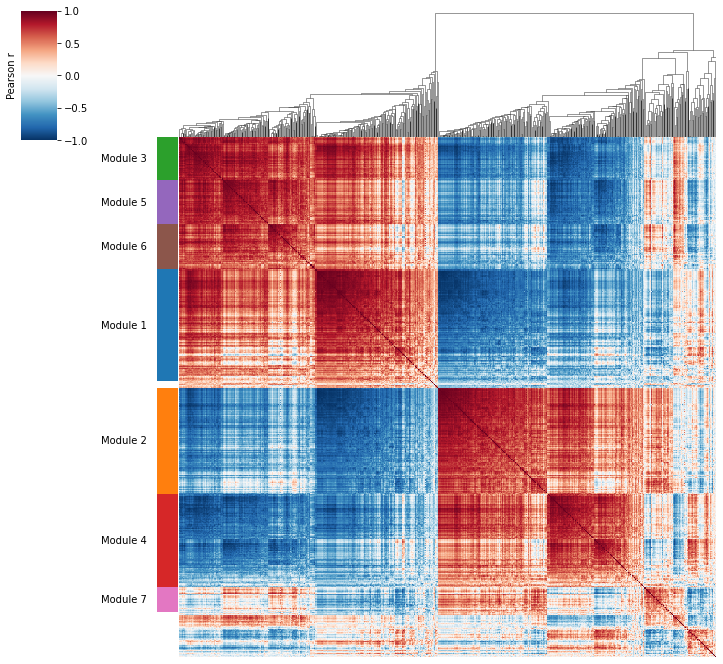

In [6]:
bwow = compute_modules(background_psi.T.corr().fillna(0), 
                min_gene_threshold=30, fdr_threshold=None, z_threshold=0.3, core_only=False)

local_correlation_plot(
            background_psi.T.corr().fillna(0), bwow[0], bwow[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False
)

In [12]:
motif_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/meme_motifs/'
mouse_motifs_exons = pd.read_csv(motif_dir + 'mouse_rbp.exons.tab', sep='\t', index_col=0)
mouse_motifs_ase = pd.read_csv(motif_dir + 'mouse_rbp.ase.tab', sep='\t', index_col=0)

human_motifs_exons = pd.read_csv(motif_dir + 'human_rbp.exons.tab', sep='\t', index_col=0)
human_motifs_ase = pd.read_csv(motif_dir + 'human_rbp.ase.tab', sep='\t', index_col=0)

In [9]:
clip_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/tiklova/'
mouse_clip_predicted = pd.read_csv(clip_dir + 'peaks_predicted_mRBP.tab', sep='\t', index_col=0)
mouse_clip_peaks = pd.read_csv(clip_dir + 'peaks_clip_tags.tab', sep='\t', index_col=0)

mouse_clip_predicted = (mouse_clip_predicted.loc[[x for x in mouse_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

mouse_clip_predicted.index= [x[:-3] for x in mouse_clip_predicted.index if x[-3:]=='_se']
mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']

In [10]:
clip_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/tiklova_hRBP/'
human_clip_predicted = pd.read_csv(clip_dir + 'peaks_predicted_hRBP.tab', sep='\t', index_col=0)

human_clip_predicted = (human_clip_predicted.loc[[x for x in human_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
human_clip_predicted.index= [x[:-3] for x in human_clip_predicted.index if x[-3:]=='_se']


In [11]:
mouse_motif_bound_ase = (mouse_motifs_ase > 0).astype(int)
human_motif_bound_ase = (human_motifs_ase > 0).astype(int)

NameError: name 'mouse_motifs_ase' is not defined

In [12]:
mouse_motif_bound_se = (mouse_motif_bound_se.loc[[x for x in mouse_motif_bound_se.index if x[-3:]=='_se']] > 0).astype(int)
human_motif_bound_se = (human_motif_bound_se.loc[[x for x in human_motif_bound_se.index if x[-3:]=='_se']] > 0).astype(int)

mouse_motif_bound_se.index= [x[:-3] for x in mouse_motif_bound_se.index if x[-3:]=='_se']
human_motif_bound_se.index= [x[:-3] for x in human_motif_bound_se.index if x[-3:]=='_se']

NameError: name 'mouse_motif_bound_se' is not defined

In [ ]:
mouse_motif_bound_se.loc[[x for x in mouse_motif_bound_se.index if x[-3:]=='_se']]

In [22]:
exons_sorted = tiklova_psix.sort_values('L_score').index[::-1]

In [10]:
def enrichment_score(signal, exon_score=1):
    if exon_score == 1:
        Nr = np.sum(signal)
        exon_score = [1]*len(signal)
        denominator = len(signal) - Nr
    
    p_hit = []
    p_miss = []
    current_p_hit = 0
    current_p_miss = 0
    for i in range(len(signal)):
        if signal[i] > 0:
            current_p_hit += exon_score[i]/Nr
        else:
            current_p_miss += 1/denominator
        
        p_hit.append(current_p_hit)
        p_miss.append(current_p_miss)
        
    p_hit = np.array(p_hit)
    p_miss = np.array(p_miss)
    return p_hit-p_miss
    
def gsea(signal, permutations=2000):
    ES = np.max(enrichment_score(signal))
    ES_random = []
    for i in tqdm(range(permutations)):
        random_signal = np.random.choice(signal, len(signal), replace=False)
        ES_random.append(np.max(enrichment_score(random_signal)))
        
    ES_random = np.array(ES_random)
    p_val = (np.sum(ES_random > ES)+1)/(permutations+1)
    return ES, p_val

In [ ]:
gsea(list(mouse_motif_bound_ase.loc[exons_sorted].Rbfox1))

In [95]:
gsea(list(mouse_motif_bound_ase.loc[exons_sorted].Nova1))

100%|██████████| 2000/2000 [00:05<00:00, 391.77it/s]


(0.12553564053544652, 0.0004997501249375312)

In [134]:
gsea(list(mouse_clip_peaks.loc[exons_sorted].NOVA1))

100%|██████████| 2000/2000 [00:05<00:00, 386.49it/s]


(0.37208431836091643, 0.0004997501249375312)

In [130]:
gsea(list(mouse_clip_predicted.loc[exons_sorted].RBFOX2))

100%|██████████| 2000/2000 [00:05<00:00, 354.33it/s]


(0.09171773680864478, 0.008995502248875561)

In [125]:
gsea(list(mouse_motif_bound_se.loc[exons_sorted].Rbfox1))

100%|██████████| 2000/2000 [00:05<00:00, 361.59it/s]


(0.06463373655916349, 0.3453273363318341)

In [99]:
gsea(list(human_motif_bound_ase.loc[exons_sorted].RBFOX2))

100%|██████████| 2000/2000 [00:04<00:00, 411.85it/s]


(0.0683830439728833, 0.14992503748125938)

In [110]:
mouse_pvals = []
for exon in mouse_motif_bound_ase.columns:
    mouse_pvals.append(gsea(list(mouse_motif_bound_ase.loc[exons_sorted][exon]))[1])

100%|██████████| 2000/2000 [00:05<00:00, 374.45it/s]


(array([ 9.,  5.,  1.,  5.,  5.,  5.,  3.,  3.,  2.,  2.,  2.,  5.,  1.,
         3.,  3.,  3.,  2.,  2.,  3., 10.]),
 array([0.00149925, 0.0513993 , 0.10129935, 0.1511994 , 0.20109945,
        0.2509995 , 0.30089955, 0.3507996 , 0.40069965, 0.4505997 ,
        0.50049975, 0.5503998 , 0.60029985, 0.6501999 , 0.70009995,
        0.75      , 0.79990005, 0.8498001 , 0.89970015, 0.9496002 ,
        0.99950025]),
 <a list of 20 Patch objects>)

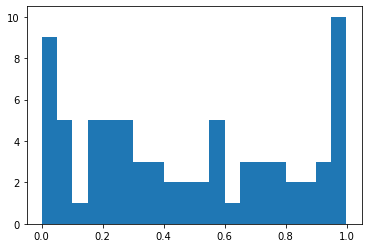

In [111]:
plt.hist(mouse_pvals, bins=20)

In [112]:
from statsmodels.stats.multitest import multipletests
multipletests(mouse_pvals, method='fdr_bh')

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]),
 array([0.9394877 , 0.686007  , 0.3486828 , 0.99950025, 0.79563076,
        0.69499733, 0.99950025, 0.99950025, 0.39138764, 0.99950025,
        0.99950025, 0.99950025, 0.99950025, 0.9394877 , 0.99950025,
        0.99950025, 0.99950025, 0.686007  , 0.99950025, 0.99950025,
        0.86517268, 0.92013517, 0.39138764, 0.69499733, 0.39138764,
        0.99950025, 0.48868423, 0.9394877 , 0.11094453, 0.69499733,


In [114]:
np.min(mouse_pvals)

0.0014992503748125937

In [117]:
3/2001

0.0014992503748125937

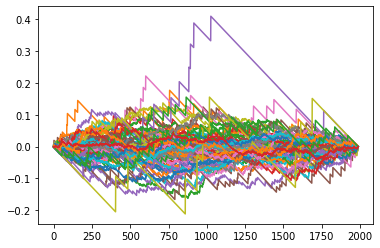

In [71]:
for rbp in mouse_motif_bound_ase.columns:
    plt.plot(range(len(exons_sorted)),enrichment_score(list(mouse_motif_bound_ase.loc[exons_sorted][rbp])))

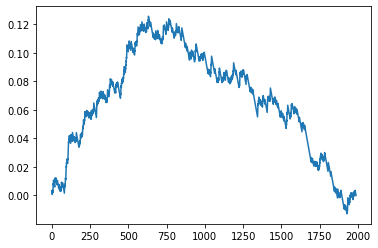

In [72]:
plt.plot(range(len(exons_sorted)),enrichment_score(list(mouse_motif_bound_ase.loc[exons_sorted].Nova1)))

In [19]:
list_modules = []

colores = ['forestgreen', 'indigo', 'brown', 'navy']
colores_lista = []
module_list = [1, 2, 3, 4, 5, 6, 7]#[3, 5, 6, 1]
for i in range(4):
    lista = list(bwow[0][bwow[0] == module_list[i]].index)
    list_modules += lista
    colores_lista.extend([colores[i]]*len(lista))
    
colores_idx = list(range(len(colores_lista)))
    
not_there = [x for x in tiklova_psix.index if x not in list_modules]
list_modules += not_there

step = len(list_modules)

# colores_idx += list(range(colores_idx[-1]+1, len(list_modules)))

# module_list = [7, 4, 2]
# colores = ['darkorange', 'red', 'pink']
# for i in range(3):
#     lista = list(bwow[0][bwow[0] == module_list[i]].index)
#     list_modules += lista
#     colores_lista.extend([colores[i]]*len(lista))
    
# colores_idx += list(range(step, len(list_modules)))

In [ ]:
plt.plot(range(len(list_modules)),enrichment_score(list(mouse_motif_bound_ase.loc[list_modules].Rbfox1)))

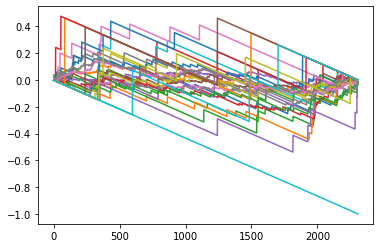

In [138]:
for rbp in mouse_clip_peaks.columns:
    plt.plot(range(len(list_modules)),enrichment_score(list(mouse_clip_peaks.loc[list_modules][rbp])))

In [19]:
gsea(list(mouse_clip_peaks.loc[list_modules].NOVA1))

100%|██████████| 2000/2000 [00:06<00:00, 310.52it/s]


(0.16937367066767864, 0.0014992503748125937)

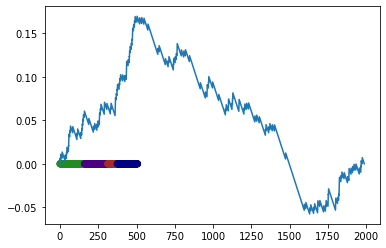

In [23]:
plt.plot(range(len(list_modules)),enrichment_score(list(mouse_clip_peaks.loc[list_modules]['NOVA1'])))
plt.scatter(colores_idx, [0]*508, c= colores_lista)

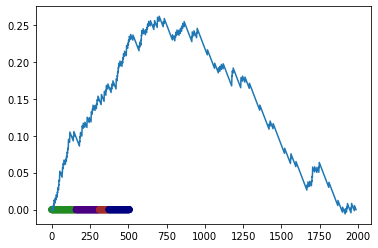

In [24]:
plt.plot(range(len(list_modules)),enrichment_score(list(mouse_clip_peaks.loc[exons_sorted]['NOVA1'])))
plt.scatter(colores_idx, [0]*508, c= colores_lista)

In [26]:
mouse_pvals = []
for rbp in mouse_clip_peaks.columns:
    mouse_pvals.append(gsea(list(mouse_clip_peaks.loc[exons_sorted][rbp]))[1])

100%|██████████| 2000/2000 [00:05<00:00, 392.23it/s]


RBFOX1


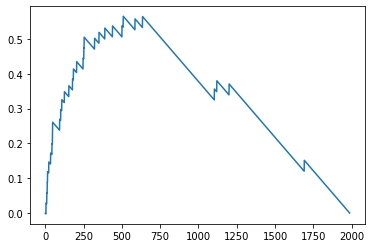

RBFOX2


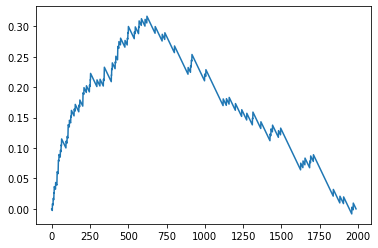

RBFOX3


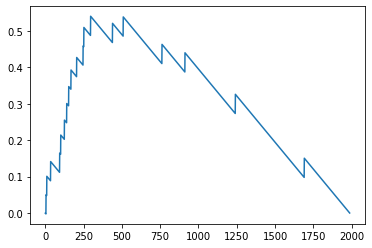

SRSF3


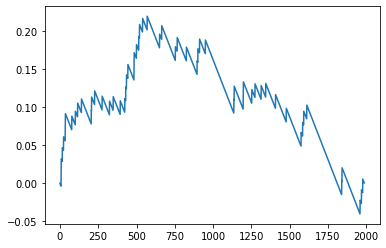

SRSF4


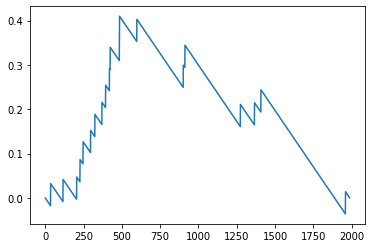

SRSF6


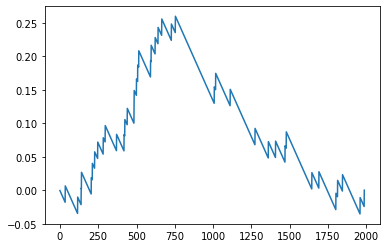

SRSF7


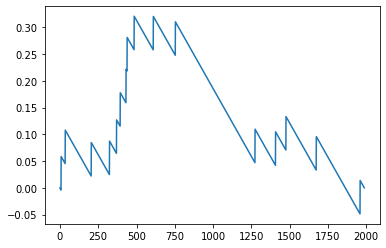

TARDBP


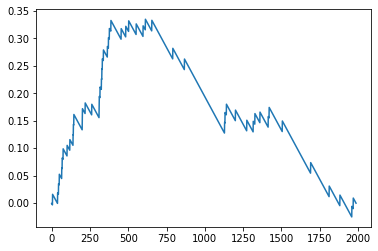

CELF4


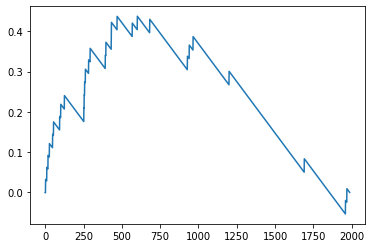

CIRBP


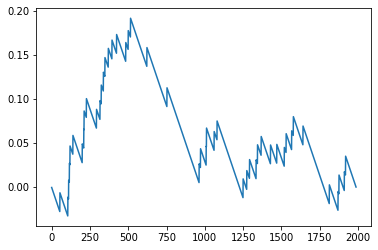

ELAVL1


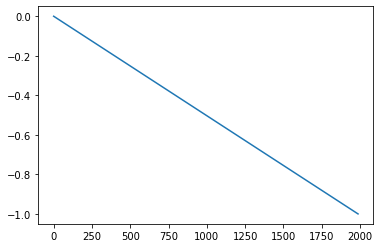

LIN28A


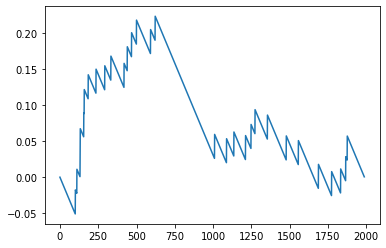

NOVA1


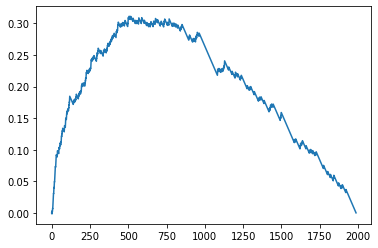

NOVA2


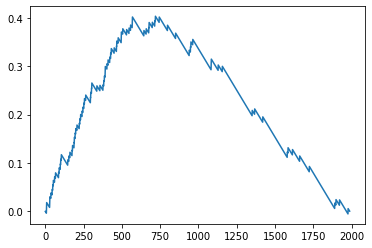

PTBP1


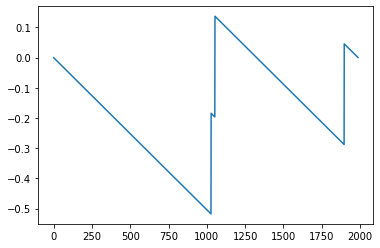

In [35]:
from statsmodels.stats.multitest import multipletests
sig_gsea = multipletests(mouse_pvals, method='fdr_bh')[0]

for i in range(len(mouse_clip_peaks.columns)):
    if sig_gsea[i]:
        print(mouse_clip_peaks.columns[i])
        plt.plot(range(len(list_modules)),enrichment_score(list(mouse_clip_peaks.loc[exons_sorted][mouse_clip_peaks.columns[i]])))
        plt.show()

In [36]:
mouse_clip_peaks

,RBFOX1,RBFOX2,RBFOX3,RBM3,SRRM4,SRSF1,SRSF2,SRSF3,SRSF4,SRSF5,...,EZH2,FMR1,LIN28A,MBNL1MBNL2,MBNL1,MBNL2,NOVA1,NOVA2,PABPC1,PTBP1
Aamdc_10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aamdc_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aamdc_nmdSE_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aasdhppt_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abat_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zmynd8_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Znhit1_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zscan18_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zyx_1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


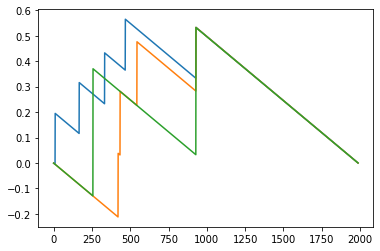

In [37]:
for rbp in ['MBNL1', 'MBNL1MBNL2', 'MBNL2']:
    plt.plot(range(len(list_modules)),enrichment_score(list(mouse_clip_peaks.loc[exons_sorted][rbp])))

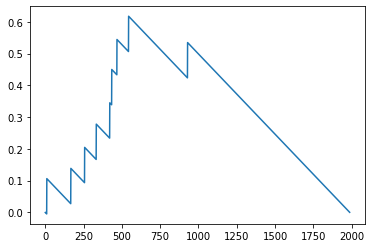

In [44]:
plt.plot(range(len(exons_sorted)),
         enrichment_score(mouse_clip_peaks.loc[exons_sorted,['MBNL1', 'MBNL1MBNL2', 'MBNL2']].max(axis=1)))

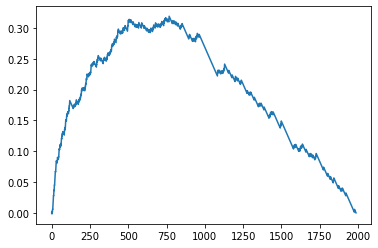

In [45]:
plt.plot(range(len(exons_sorted)),
         enrichment_score(mouse_clip_peaks.loc[exons_sorted,['NOVA1', 'NOVA2']].max(axis=1)))

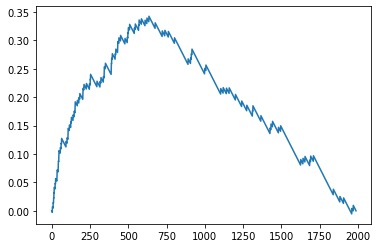

In [46]:
plt.plot(range(len(exons_sorted)),
         enrichment_score(mouse_clip_peaks.loc[exons_sorted,['RBFOX1', 'RBFOX2', 'RBFOX3']].max(axis=1)))

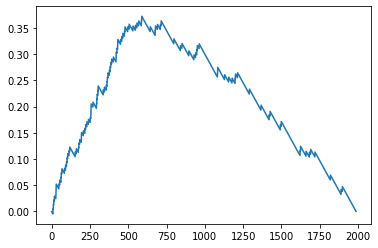

In [357]:
plt.plot(range(len(list_modules)),enrichment_score(list(mouse_clip_peaks.loc[exons_sorted]['NOVA1'])))

0.0011317801763951318

In [147]:
import scipy.stats as ss
hpd = ss.hypergeom(1988, 108, 160)
hpd.pmf(18)

def test_enrichment(binding, exon_cluster):
    M = len(binding)
    n = binding.sum()
    N = len(exon_cluster)
    k = binding.loc[exon_cluster].sum()
    hpd = ss.hypergeom(M, n, N)
    
    enrichment = (k/N)/(n/M)
    
    return hpd.pmf(k), enrichment

In [32]:
hyper_pvals = []
for rbp in mouse_clip_peaks.columns:
    for cluster in [1]:
        hyper_pvals.append(test_enrichment(mouse_clip_peaks[rbp], bwow[0].index[bwow[0]==cluster])[0])

/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


(array([9., 3., 3., 3., 2., 1., 0., 1., 0., 1., 0., 1., 0., 1., 2., 1., 0.,
        1., 0., 1.]),
 array([6.35139253e-05, 5.00603382e-02, 1.00057163e-01, 1.50053987e-01,
        2.00050811e-01, 2.50047635e-01, 3.00044460e-01, 3.50041284e-01,
        4.00038108e-01, 4.50034933e-01, 5.00031757e-01, 5.50028581e-01,
        6.00025406e-01, 6.50022230e-01, 7.00019054e-01, 7.50015878e-01,
        8.00012703e-01, 8.50009527e-01, 9.00006351e-01, 9.50003176e-01,
        1.00000000e+00]),
 <a list of 20 Patch objects>)

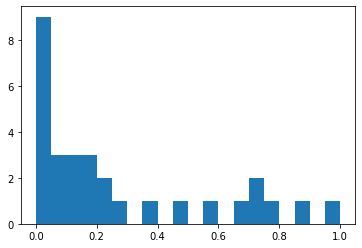

In [33]:
plt.hist(hyper_pvals, bins=20)

In [34]:
from statsmodels.stats.multitest import multipletests
mouse_clip_peaks.columns[multipletests(hyper_pvals, method='fdr_bh')[0]]


Index(['RBFOX1', 'CELF4', 'NOVA1', 'NOVA2'], dtype='object')

In [410]:
# mouse_clip_peaks.loc[exons_sorted]['NOVA1'].sum()

test_enrichment(mouse_clip_peaks['NOVA2'], bwow[0].index[bwow[0]==1])

(0.000329029948819832, 2.3110714285714287)

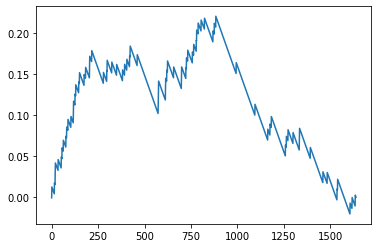

In [408]:
# list(bwow[0].index[bwow[0]==1]) + not_there

plt.plot(range(len(list(bwow[0].index[bwow[0]==1]) + not_there)),
         enrichment_score(list(mouse_clip_peaks.loc[list(bwow[0].index[bwow[0]==1]) + not_there]['NOVA1'])))

In [280]:
len(bwow[0].index[bwow[0]==3])

62

In [271]:
len(exons_sorted)

1988

In [ ]:
M = 52  # Total number of cards
n = 26  # Number of Type I cards (e.g. red cards) 
N = 5   # Number of draws (5 cards dealt in one poker hand)
k = 3   # Number of Type I cards we want in one hand

(array([19.,  2.,  1.,  3.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([4.99750125e-04, 8.30084958e-02, 1.65517241e-01, 2.48025987e-01,
        3.30534733e-01, 4.13043478e-01, 4.95552224e-01, 5.78060970e-01,
        6.60569715e-01, 7.43078461e-01, 8.25587206e-01]),
 <a list of 10 Patch objects>)

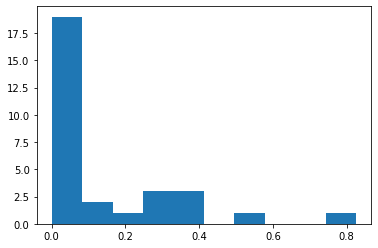

In [241]:
plt.hist(mouse_pvals)

In [15]:
plt.plot(range(len(list_modules)),enrichment_score(list(mouse_motif_bound_se.loc[exons_sorted]['Nova1'])))
plt.scatter(colores_idx, [0]*508, c= colores_lista)

NameError: name 'list_modules' is not defined

In [31]:
clip_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/tiklova/'
mouse_clip_predicted = pd.read_csv(clip_dir + 'peaks_predicted_mRBP.tab', sep='\t', index_col=0)
mouse_clip_peaks = pd.read_csv(clip_dir + 'peaks_clip_tags.tab', sep='\t', index_col=0)

mouse_clip_predicted = (mouse_clip_predicted.loc[[x for x in mouse_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

mouse_clip_predicted.index= [x[:-3] for x in mouse_clip_predicted.index if x[-3:]=='_se']
mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']

## Length overlap correction

In [13]:
clip_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/tiklova/'

mouse_clip_peaks = pd.read_csv(clip_dir + 'peaks_clip_tags_overlap_len.tab', sep='\t', index_col=0)

mouse_clip_predicted = (mouse_clip_predicted.loc[[x for x in mouse_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

mouse_clip_predicted.index= [x[:-3] for x in mouse_clip_predicted.index if x[-3:]=='_se']
mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']


In [14]:
mouse_clip_peaks = pd.read_csv(clip_dir + 'peaks_clip_tags_overlap_len.tab', sep='\t', index_col=0)
exon_lengths = pd.read_csv('~/Network/Mouse/SplicingNetwork/L_score_events/tiklova/exon_lengths.tab', sep='\t',
                           index_col=0, names=['exon', 'ase', 'length']).loc[mouse_clip_peaks.index]
exon_lengths.index == mouse_clip_peaks.index

array([ True,  True,  True, ...,  True,  True,  True])

In [15]:
mouse_clip_overlap = mouse_clip_peaks.divide(exon_lengths.length, axis=0)

In [16]:

mouse_clip_overlap = mouse_clip_overlap.loc[[x for x in mouse_clip_overlap.index if x[-3:]=='_se']]
mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

mouse_clip_overlap.index= [x[:-3] for x in mouse_clip_overlap.index if x[-3:]=='_se']
mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']

In [20]:
def enrichment_score(signal, exon_score=1):
    Nr = np.sum(signal)
    #exon_score = [1]*len(signal)
    denominator = len(signal) - np.sum(np.array(signal)>0)
    
    p_hit = []
    p_miss = []
    current_p_hit = 0
    current_p_miss = 0
    for i in range(len(signal)):
        if signal[i] > 0:
            current_p_hit += signal[i]/Nr
        else:
            current_p_miss += 1/denominator
        
        p_hit.append(current_p_hit)
        p_miss.append(current_p_miss)
        
    p_hit = np.array(p_hit)
    p_miss = np.array(p_miss)
    return p_hit-p_miss
    
def gsea(signal, permutations=2000):
    ES = np.max(enrichment_score(signal))
    ES_random = []
    for i in tqdm(range(permutations)):
        random_signal = np.random.choice(signal, len(signal), replace=False)
        ES_random.append(np.max(enrichment_score(random_signal)))
        
    ES_random = np.array(ES_random)
    p_val = (np.sum(ES_random >= ES)+1)/(permutations+1)
    return ES, p_val

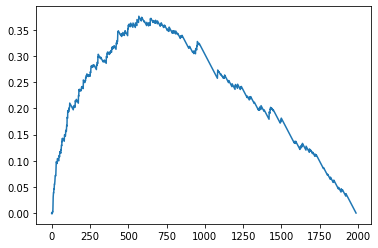

In [23]:
plt.plot(range(len(list_modules)),enrichment_score(list(mouse_clip_overlap.loc[exons_sorted]['NOVA1'])))

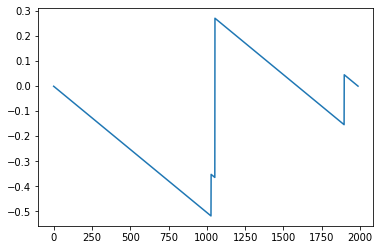

In [25]:
plt.plot(range(len(list_modules)),enrichment_score(list(mouse_clip_overlap.loc[exons_sorted]['PTBP1'])))

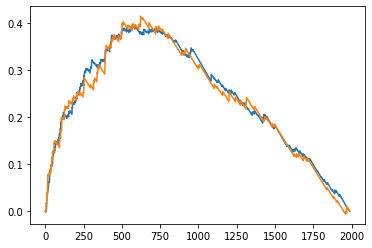

In [26]:
plt.plot(range(len(list_modules)),
         enrichment_score(list(mouse_clip_overlap.loc[exons_sorted][['NOVA1', 'NOVA2']].max(axis=1))))

plt.plot(range(len(list_modules)),
         enrichment_score(list(mouse_clip_overlap.loc[exons_sorted][['RBFOX1', 'RBFOX2', 'RBFOX3']].max(axis=1))))

# plt.plot(range(len(list_modules)),
#          enrichment_score(list(mouse_clip_overlap.loc[exons_sorted][['MBNL1', 'MBNL2', 'MBNL1MBNL2']].max(axis=1))))

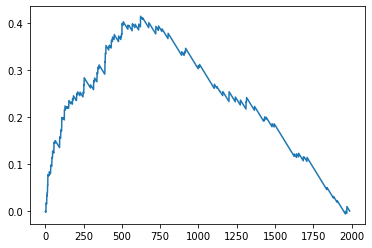

In [27]:
plt.plot(range(len(list_modules)),
         enrichment_score(list(mouse_clip_overlap.loc[exons_sorted][['RBFOX1', 'RBFOX2', 'RBFOX3']].max(axis=1))))

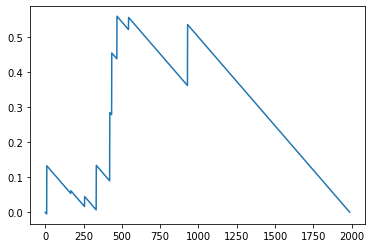

In [29]:
plt.plot(range(len(list_modules)),
         enrichment_score(list(mouse_clip_overlap.loc[exons_sorted][['MBNL1', 'MBNL2', 'MBNL1MBNL2']].max(axis=1))))

In [30]:
import scipy.stats as ss
hpd = ss.hypergeom(1988, 108, 160)
hpd.pmf(18)

def test_enrichment(binding, exon_cluster):
    M = len(binding)
    n = binding.sum()
    N = len(exon_cluster)
    k = binding.loc[exon_cluster].sum()
    hpd = ss.hypergeom(M, n, N)
    
    enrichment = (k/N)/(n/M)
    
    return hpd.pmf(k), enrichment

In [31]:
hyper_pvals = []
for rbp in mouse_clip_peaks.columns:
    hyper_pvals.append(test_enrichment(mouse_clip_peaks[rbp], bwow[0].index[(bwow[0]==7)])[0])
    
from statsmodels.stats.multitest import multipletests
mouse_clip_peaks.columns[multipletests(hyper_pvals, method='fdr_bh')[0]]


/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Index(['TARDBP', 'AGO2'], dtype='object')

In [32]:
from statsmodels.stats.multitest import multipletests
mouse_clip_peaks.columns[multipletests(hyper_pvals, method='fdr_bh')[0]]


Index(['TARDBP', 'AGO2'], dtype='object')

In [33]:
[x for x in sig_exons if 'Srsf' in x]

['Srsf10_nmdSE_1',
 'Srsf9_2',
 'Srsf9_nmdSE_1',
 'Srsf2_1',
 'Srsf11_nmdSE_2',
 'Srsf6_1',
 'Srsf6_nmdSE_1',
 'Srsf9_nmdSE_2',
 'Srsf7_nmdSE_1']

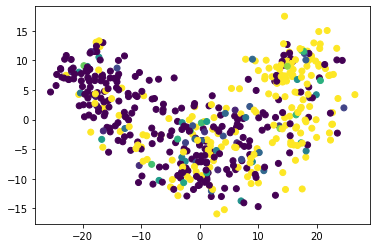

In [34]:
plt.scatter(tiklova_rd.PC_1, tiklova_rd.PC_2, c=tiklova_PSI.loc['Srsf9_nmdSE_2'])

In [35]:
bwow[0].loc['Srsf9_nmdSE_2']

3

In [36]:
hyper_pvals = []
for rbp in human_clip_predicted.columns:
    hyper_pvals.append(test_enrichment(human_clip_predicted[rbp], [x for x in sig_exons if ('Srsf' in x) and ('nmdSE' in x)])[0])
    
from statsmodels.stats.multitest import multipletests
human_clip_predicted.columns[multipletests(hyper_pvals, method='fdr_bh')[0]]


Index(['SRSF7'], dtype='object')

In [37]:
mouse_clip_overlap.loc[[x for x in sig_exons if ('Srsf' in x) and ('nmdSE' in x)], [y for y in mouse_clip_overlap.columns if 'SRSF' in y]]

,SRSF1,SRSF2,SRSF3,SRSF4,SRSF5,SRSF6,SRSF7
Srsf10_nmdSE_1,0.716578,0.864528,0.071301,0.035651,0.000000,0.249554,0.0
Srsf9_nmdSE_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Srsf11_nmdSE_2,0.377358,0.503145,0.000000,0.000000,0.000000,0.000000,0.0
Srsf6_nmdSE_1,0.597015,0.910448,0.000000,0.341151,0.042644,0.810235,0.0
Srsf9_nmdSE_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Srsf7_nmdSE_1,0.523077,0.830769,0.553846,0.092308,0.061538,0.153846,1.0


In [38]:
hyper_pvals = []
for rbp in mouse_clip_peaks.columns:
    hyper_pvals.append(test_enrichment(mouse_clip_peaks[rbp], [x for x in sig_exons if ('Srsf' in x) and ('nmdSE' in x)])[0])
    
from statsmodels.stats.multitest import multipletests
mouse_clip_peaks.columns[multipletests(hyper_pvals, method='fdr_bh')[0]]


/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Index(['SRRM4', 'SRSF1', 'SRSF2', 'SRSF3', 'SRSF4', 'SRSF5', 'SRSF6'], dtype='object')

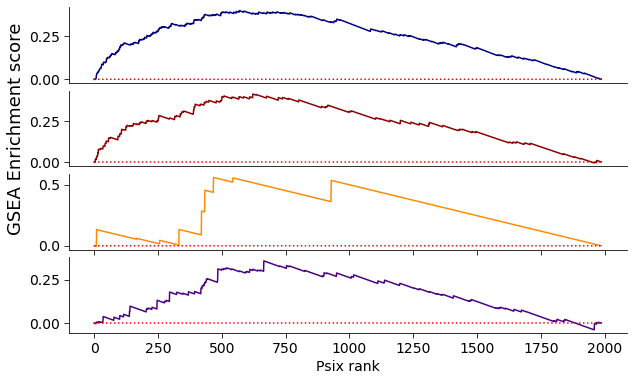

In [70]:
from IPython.core.pylabtools import figsize
from matplotlib.gridspec import GridSpec
figsize(10, 6) # This is for regular size
# figsize(15, 4)
fig = plt.figure()

# fig.suptitle('p-values of Kruskal-Wallis test', fontsize=28)

gs = GridSpec(4,1)
gs.update(wspace=0.05, hspace=0.10)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[1,0])
ax_3 = fig.add_subplot(gs[2,0])
ax_4 = fig.add_subplot(gs[3,0])

# ax_1.set_ylim((-0.05,1.05))
# ax_2.set_ylim((-0.05,1.05))
# ax_3.set_ylim((-0.05,1.05))

# ax_1.plot([0, 1], [0, 1], c='gray', linestyle=':')
# ax_2.plot([0, 1], [0, 1], c='gray', linestyle=':')
# ax_3.plot([0, 1], [0, 1], c = 'gray', linestyle=':')

ax_1.plot(range(len(list_modules)),
         enrichment_score(list(mouse_clip_overlap.loc[exons_sorted][['NOVA1', 'NOVA2']].max(axis=1))), c='navy')

ax_2.plot(range(len(list_modules)),
         enrichment_score(list(mouse_clip_overlap.loc[exons_sorted][['RBFOX1', 'RBFOX2', 'RBFOX3']].max(axis=1))), c='darkred')

ax_3.plot(range(len(list_modules)),
         enrichment_score(list(mouse_clip_overlap.loc[exons_sorted][['MBNL1', 'MBNL2', 'MBNL1MBNL2']].max(axis=1))), 
          c='darkorange')

ax_4.plot(range(len(list_modules)),
         enrichment_score(list(mouse_clip_overlap.loc[exons_sorted][['SRSF3', 'SRSF4', 'SRSF5', 'SRSF6', 'SRSF7']].max(axis=1))), 
          c='indigo')

plt.setp(ax_1.get_xticklabels(), visible=False)
plt.setp(ax_2.get_xticklabels(), visible=False)
ax_1.xaxis.set_ticks_position('none')
ax_2.xaxis.set_ticks_position('none')

ax_4.set_xlabel('Psix rank', fontsize=14)
for ax in [ax_1, ax_2, ax_3, ax_4]:
    ax.tick_params(labelsize=14, length=5)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
#     ax.spines["bottom"].set_visible(False)
    ax.plot(range(len(list_modules)),
         [0]*len(list_modules), c='red', linestyle=':')

ax_4.spines["bottom"].set_visible(True)

# ax_1.text(0.05, 1, 'Chen', fontsize=28, verticalalignment='top')
# ax_2.text(0.05, 1, 'Trapnell', fontsize=28, verticalalignment='top')
# ax_3.text(0.05, 1, 'Song', fontsize=28, verticalalignment='top')

ax_2.set_ylabel('GSEA Enrichment score', fontsize = 18)

plt.show()

In [65]:
mouse_pvals = []
for rbp in mouse_clip_overlap.columns:
    mouse_pvals.append(gsea(list(mouse_clip_overlap.loc[exons_sorted][rbp]))[1])

100%|██████████| 2000/2000 [00:06<00:00, 323.39it/s]


RBFOX1


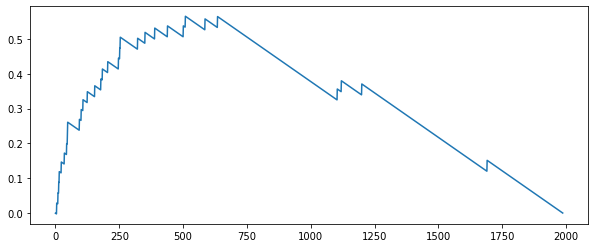

RBFOX2


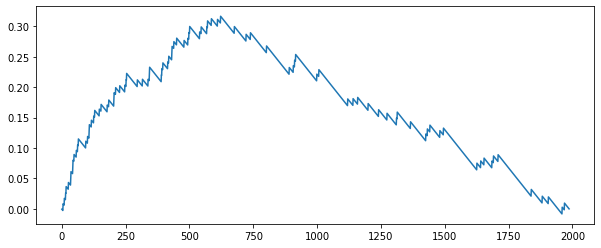

RBFOX3


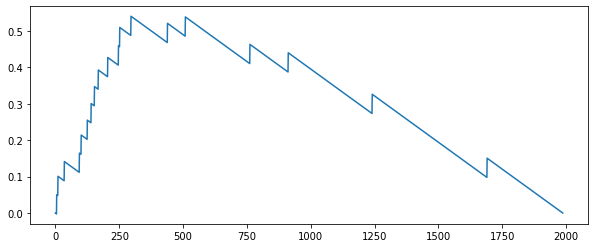

SRSF3


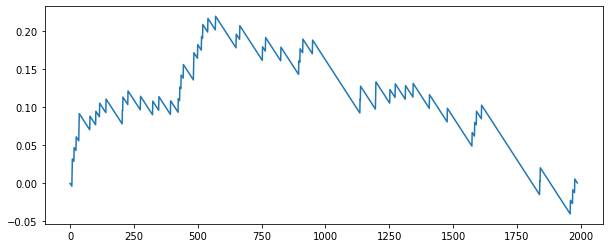

SRSF4


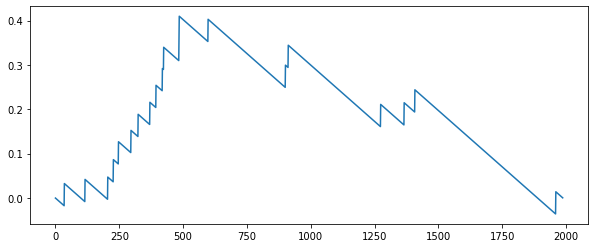

SRSF5


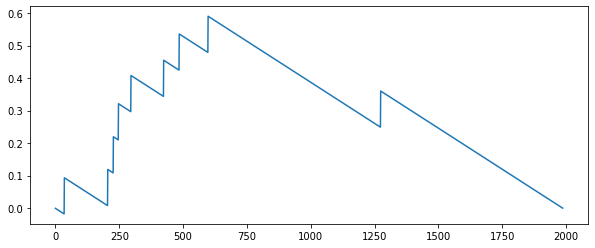

SRSF6


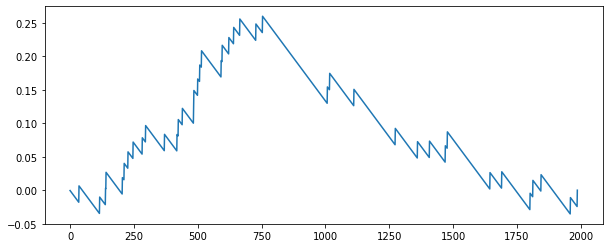

SRSF7


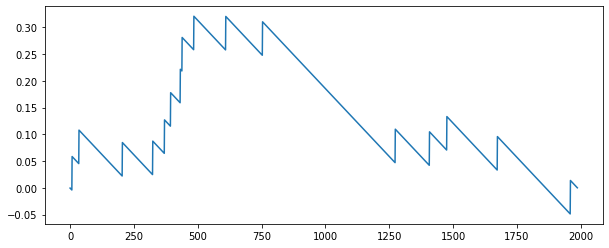

TARDBP


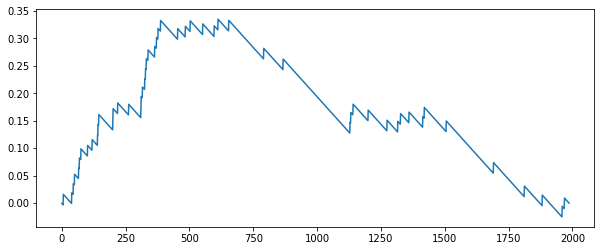

CELF4


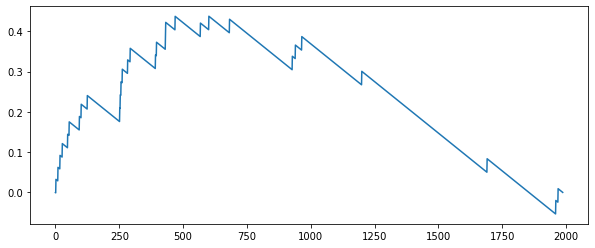

LIN28A


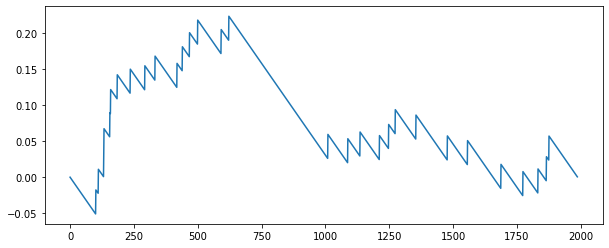

NOVA1


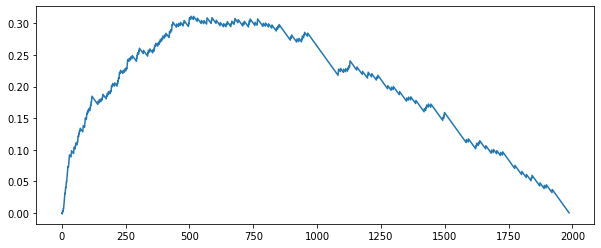

NOVA2


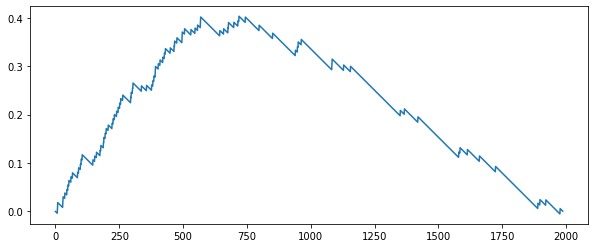

In [66]:
from statsmodels.stats.multitest import multipletests
sig_gsea = multipletests(mouse_pvals, method='fdr_bh')[0]

for i in range(len(mouse_clip_peaks.columns)):
    if sig_gsea[i]:
        print(mouse_clip_peaks.columns[i])
        plt.plot(range(len(list_modules)),enrichment_score(list(mouse_clip_peaks.loc[exons_sorted][mouse_clip_peaks.columns[i]])))
        plt.show()